# 필요한 라이브러리 임포트

In [53]:
from tensorflow import keras
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt

# 파일들 불러오기

In [54]:
with open("/content/train_data.p", "rb") as f:
  data = pickle.load(f)
with open("/content/label.p", "rb") as f:
  label = pickle.load(f)

# 불러온 데이터들을 랜덤한 시드로 섞기

In [55]:
seed = np.arange(len(data))
random.shuffle(seed)

In [56]:
data = data[seed]
label = label[seed]

# 모델 생성
---
### 이진 분류 모델이고 입력값의 차원이 3이므로 아래와 같이 작성

In [57]:
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(3,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# 모델 컴파일
---
### 최적화 방법은 adam, loss는 binary cross entropy 사용

In [58]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["acc"])

# 모델 학습
---
### 에포크는 100회 validation data는 20% 비율로 사용

In [59]:
history = model.fit(data, label, epochs=100, validation_split=0.2)

Epoch 1/100
25/25 [==============================] - 4s 32ms/step - loss: 0.4688 - acc: 0.7997 - val_loss: 0.6402 - val_acc: 0.7868
Epoch 2/100
25/25 [==============================] - 1s 22ms/step - loss: 0.3937 - acc: 0.8342 - val_loss: 0.5691 - val_acc: 0.7919
Epoch 3/100
25/25 [==============================] - 0s 17ms/step - loss: 0.3924 - acc: 0.8304 - val_loss: 0.5669 - val_acc: 0.7919
Epoch 4/100
25/25 [==============================] - 0s 16ms/step - loss: 0.3716 - acc: 0.8380 - val_loss: 0.5239 - val_acc: 0.7919
Epoch 5/100
25/25 [==============================] - 1s 25ms/step - loss: 0.3893 - acc: 0.8367 - val_loss: 0.5313 - val_acc: 0.7919
Epoch 6/100
25/25 [==============================] - 1s 21ms/step - loss: 0.3745 - acc: 0.8418 - val_loss: 0.4951 - val_acc: 0.7919
Epoch 7/100
25/25 [==============================] - 1s 28ms/step - loss: 0.3820 - acc: 0.8316 - val_loss: 0.4924 - val_acc: 0.7919
Epoch 8/100
25/25 [==============================] - 0s 19ms/step - loss: 0.

# 훈련 손실 그래프

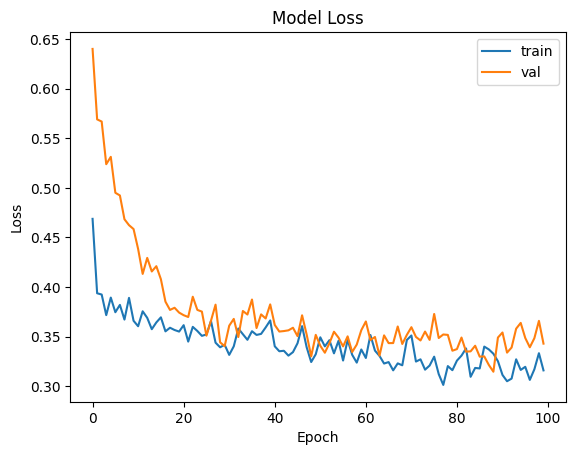

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')
plt.show()


# 훈련 정확도 그래프

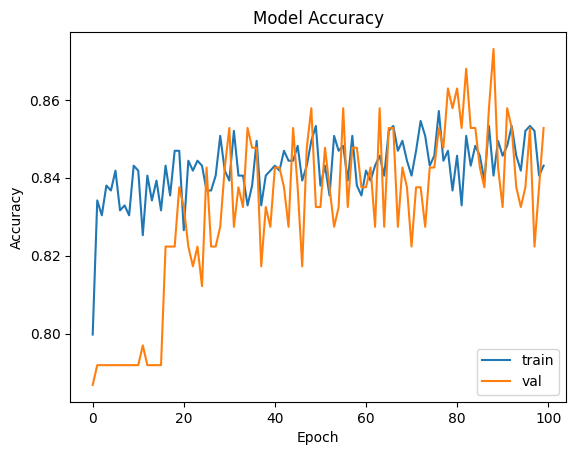

In [66]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')
plt.show()


In [67]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
